In [1]:
threshold = 2


from matplotlib import pyplot as plt
from IPython.display import clear_output
%matplotlib inline
import time
import matplotlib.dates as mdates
import matplotlib.backends.backend_pdf
import tdc_daq as td
import db
import pasttrec_ctrl as ptc
import datetime
ptc.init_active_boards()

layer_wires_list=[[],[],[],[],[],[]]
layer_counts_list=[[],[],[],[],[],[]]
wires_lenght_list=[
[39.20,39.94,40.68,41.43,42.17,42.91,43.65,44.39,45.14,45.88,46.62,47.36,48.10,48.85,49.59,50.33,51.07,51.81,52.56,53.30,54.04,54.78,55.52,56.27,57.01,57.75,58.49,59.23,59.98,60.72,61.46,62.20,62.94,63.69,64.43,65.17,65.91,66.66,67.40,68.14,68.88,69.62,70.37,71.11,71.85,72.59,73.33,74.08,74.82,75.56,76.30,77.04,77.79,78.53,79.27,80.01,80.75,81.50,82.24,82.98,83.72,84.46,85.21,85.95,86.69,87.43,88.17,88.92,89.66,90.40,91.50,91.10,90.15,89.20,88.25,87.31,86.36,85.41,84.46,83.51,82.56,81.61,80.67,79.72,78.77,77.82,76.87,75.92,74.97,74.03,73.08,72.13,71.18,70.23,69.28,68.34,67.39,66.44,65.49,64.54,63.59,62.64,61.70,60.75,59.80,58.85,57.90,56.95,56.00,55.06,54.11,53.16,52.21,51.26,50.31,49.36,48.42,47.47,46.52,45.57,44.62,43.67,42.73,41.78,40.83,39.88,38.93,37.98,37.03,36.09,35.14,34.19,33.24,32.29,31.34,30.39,29.45,28.50,27.55,26.60,25.65,24.70,23.76,22.81,21.86,20.91,19.96,19.01,18.06,17.12,16.17,15.22,14.27,13.32,12.37,11.42,10.48,9.53,8.58,7.63,6.68,5.73,4.78,3.84,2.89,1.94,0.99,0.04],
[23.60,24.07,24.54,25.00,25.47,25.94,26.41,26.88,27.34,27.81,28.28,28.75,29.22,29.68,30.15,30.62,31.09,31.56,32.02,32.49,32.96,33.43,33.90,34.36,34.83,35.30,35.77,36.24,36.70,37.17,37.64,38.11,38.58,39.04,39.51,39.98,40.45,40.91,41.38,41.85,42.32,42.79,43.25,43.72,44.19,44.66,45.13,45.59,46.06,46.53,47.00,47.47,47.93,48.40,48.87,49.34,49.81,50.27,50.74,51.21,51.68,52.15,52.61,53.08,53.55,54.02,54.49,54.95,55.42,55.89,56.36,56.83,57.29,57.76,58.23,58.70,59.17,59.63,60.10,60.57,61.04,61.51,61.97,62.44,62.91,63.38,63.85,64.31,64.78,65.25,65.72,66.19,66.65,67.12,67.59,68.06,68.53,68.99,69.46,69.93,70.40,70.86,71.33,71.80,72.27,72.74,73.20,73.67,74.14,74.61,75.08,75.54,76.01,76.48,76.95,77.42,77.88,78.35,78.82,79.29,79.76,80.22,80.69,81.16,81.63,82.10,82.56,83.03,83.50,83.70,82.80,81.14,79.49,77.83,76.18,74.52,72.86,71.21,69.55,67.90,66.24,64.59,62.93,61.27,59.62,57.96,56.31,54.65,52.99,51.34,49.68,48.03,46.37,44.71,43.06,41.40,39.75,38.09,36.44,34.78,33.12,31.47,29.81,28.16,26.50,24.89,23.23,21.58,19.93,18.28,16.62,14.97,13.32,11.67,10.01,8.36],
[25.10,25.51,25.92,26.32,26.73,27.14,27.55,27.95,28.36,28.77,29.18,29.58,29.99,30.4,30.81,31.21,31.62,32.03,32.44,32.85,33.25,33.66,34.07,34.48,34.88,35.29,35.7,36.11,36.51,36.92,37.33,37.74,38.14,38.55,38.96,39.37,39.78,40.18,40.59,41,41.41,41.81,42.22,42.63,43.04,43.44,43.85,44.26,44.67,45.07,45.48,45.89,46.3,46.71,47.11,47.52,47.93,48.34,48.74,49.15,49.56,49.97,50.37,50.78,51.19,51.6,52,52.41,52.82,53.23,53.64,54.04,54.45,54.86,55.27,55.67,56.08,56.49,56.9,57.3,57.71,58.12,58.53,58.93,59.34,59.75,60.16,60.56,60.97,61.38,61.79,62.2,62.6,63.01,63.42,63.83,64.23,64.64,65.05,65.46,65.86,66.27,66.68,67.09,67.49,67.9,68.31,68.72,69.13,69.53,69.94,70.35,70.76,71.16,71.57,71.98,72.39,72.79,73.2,73.61,74.02,74.42,74.83,75.24,75.65,76.06,76.46,76.87,77.28,77.69,78.09,78.5,78.91,79.32,79.72,80.13,80.54,80.95,81.35,81.76,82.17,82.58,82.99,83.39,83.8,84.21,84.62,85.02,85.43,85.84,86.25,86.65,87.06,87.47,87.88,88.28,88.69,89.1],
[25.7,26.11,26.51,26.92,27.33,27.73,28.14,28.55,28.95,29.36,29.76,30.17,30.58,30.98,31.39,31.8,32.2,32.61,33.02,33.42,33.83,34.24,34.64,35.05,35.45,35.86,36.27,36.67,37.08,37.49,37.89,38.3,38.71,39.11,39.52,39.93,40.33,40.74,41.15,41.55,41.96,42.36,42.77,43.18,43.58,43.99,44.4,44.8,45.21,45.62,46.02,46.43,46.84,47.24,47.65,48.05,48.46,48.87,49.27,49.68,50.09,50.49,50.9,51.31,51.71,52.12,52.53,52.93,53.34,53.75,54.15,54.56,54.96,55.37,55.78,56.18,56.59,57,57.4,57.81,58.22,58.62,59.03,59.44,59.84,60.25,60.65,61.06,61.47,61.87,62.28,62.69,63.09,63.5,63.91,64.31,64.72,65.13,65.53,65.94,66.35,66.75,67.16,67.56,67.97,68.38,68.78,69.19,69.6,70,70.41,70.82,71.22,71.63,72.04,72.44,72.85,73.25,73.66,74.07,74.47,74.88,75.29,75.69,76.1,76.51,76.91,77.32,77.73,78.13,78.54,78.95,79.35,79.76,80.16,80.57,80.98,81.38,81.79,82.2,82.6,83.01,83.42,83.82,84.23,84.64,85.04,85.45,85.85,86.26,86.67,87.07,87.48,87.89,88.29,88.7],
[24.60,25.07,25.53,26.00,26.46,26.93,27.40,27.86,28.33,28.79,29.26,29.72,30.19,30.66,31.12,31.59,32.05,32.52,32.99,33.45,33.92,34.38,34.85,35.32,35.78,36.25,36.71,37.18,37.64,38.11,38.58,39.04,39.51,39.97,40.44,40.91,41.37,41.84,42.30,42.77,43.24,43.70,44.17,44.63,45.10,45.57,46.03,46.50,46.96,47.43,47.89,48.36,48.83,49.29,49.76,50.22,50.69,51.16,51.62,52.09,52.55,53.02,53.49,53.95,54.42,54.88,55.35,55.81,56.28,56.75,57.21,57.68,58.14,58.61,59.08,59.54,60.01,60.47,60.94,61.41,61.87,62.34,62.80,63.27,63.73,64.20,64.67,65.13,65.60,66.06,66.53,67.00,67.46,67.93,68.39,68.86,69.33,69.79,70.26,70.72,71.19,71.66,72.12,72.59,73.05,73.52,73.98,74.45,74.92,75.38,75.85,76.31,76.78,77.25,77.71,78.18,78.64,79.11,79.58,80.04,80.51,80.97,81.44,81.90,82.37,82.84,83.30,83.77,84.23,84.70,85.17,85.63,86.10,86.56,87.03,87.50,87.96,88.43,88.89,89.36,89.82,90.29,90.76,91.22,91.69,92.15,92.62,93.09,93.55,94.02,94.48,94.95,95.42,95.88,96.35,96.81,97.28,97.74,98.21,98.68,99.14,99.61,100.07,100.54,101.01,101.47,101.94,102.40,102.87,103.34,103.80,104.27],
[33.5,34.24,34.98,35.72,36.46,37.2,37.94,38.68,39.42,40.16,40.9,41.64,42.38,43.12,43.86,44.6,45.34,46.08,46.82,47.55,48.29,49.03,49.77,50.51,51.25,51.99,52.73,53.47,54.21,54.95,55.69,56.43,57.17,57.91,58.65,59.39,60.13,60.87,61.61,62.35,63.09,63.83,64.57,65.31,66.05,66.79,67.53,68.27,69.01,69.75,70.49,71.23,71.97,72.71,73.45,74.18,74.92,75.66,76.4,77.14,77.88,78.62,79.36,80.1,80.84,81.58,82.32,83.8,84.54,85.28,86.02,86.76,87.5,87.5,87.5,86.59,85.69,84.78,83.88,82.97,82.07,81.16,80.25,79.35,78.44,77.54,76.63,75.72,74.82,73.91,73.01,72.1,71.2,70.29,69.38,68.48,67.57,66.67,65.76,64.86,63.95,63.04,62.14,61.23,60.33,59.42,58.51,57.61,56.7,55.8,54.89,53.99,53.08,52.17,51.27,50.36,49.46,48.55,47.64,46.74,45.83,44.93,44.02,43.12,42.21,41.3,40.4,39.49,38.59,37.68,36.78,35.87,34.96,34.06,33.15,32.25,31.34,30.43,29.53,28.62,27.72,26.81,25.91,25.00,24.09,23.19,22.28,21.38,20.47,19.57,18.66,17.75,16.85,15.94,15.04,14.13,13.22,12.32,11.41,10.51,9.60,8.70,7.79,6.88,5.98,5.07,4.17],
]
def count_wires(fpc,mapping):
    wires = []
    if( mapping ):
        wires +=  list(range((fpc+1)*4-1,fpc*4-1, -1))
    else:
        wires +=  list(range(fpc*4,(fpc+1)*4))
    return wires

for name in db.active_board_list():
    ptc.set_threshold_for_board_by_name(name,threshold)
    #FPC A
    tdcs = db.find_tdc_by_hub("0x"+name[0:4])
    #tdcs = db.tdc_list()
    print(tdcs)
    if name[4]=="1":
        scaler_list_trend_first_tdc = td.scaler_rate(tdcs[0],range(0,32),1)
    if name[4]=="3":
        scaler_list_trend_second_tdc = td.scaler_rate(tdcs[1],range(0,32),1)
    
    fpc_a=db.get_fpca_of_board(name)
    if(fpc_a>=0):
        layer_a=db.get_a_layer_of_board(name)
        mapping_a=db.get_fpca_mapping_of_board(name)
        layer_wires_list[layer_a]+=count_wires(fpc_a,mapping_a)
        if name[4]=="1":
            layer_counts_list[layer_a]+=scaler_list_trend_first_tdc[0:4]
        if name[4]=="2":
            layer_counts_list[layer_a]+=scaler_list_trend_first_tdc[16:20]
        if name[4]=="3":
            layer_counts_list[layer_a]+=scaler_list_trend_second_tdc[0:4]
        if name[4]=="4":
            layer_counts_list[layer_a]+=scaler_list_trend_second_tdc[16:20]
    
    fpc_b=db.get_fpcb_of_board(name)
    if(fpc_b>=0):
        layer_b=db.get_b_layer_of_board(name)
        mapping_b=db.get_fpcb_mapping_of_board(name)
        layer_wires_list[layer_b]+=count_wires(fpc_b,mapping_b)
        if name[4]=="1":
            layer_counts_list[layer_b]+=scaler_list_trend_first_tdc[4:8]
        if name[4]=="2":
            layer_counts_list[layer_b]+=scaler_list_trend_first_tdc[20:24]
        if name[4]=="3":
            layer_counts_list[layer_b]+=scaler_list_trend_second_tdc[4:8]
        if name[4]=="4":
            layer_counts_list[layer_b]+=scaler_list_trend_second_tdc[20:24]
    fpc_c=db.get_fpcc_of_board(name)
    if(fpc_c>=0):
        layer_c=db.get_c_layer_of_board(name)
        mapping_c=db.get_fpcc_mapping_of_board(name)
        layer_wires_list[layer_c]+=count_wires(fpc_c,mapping_c)
        if name[4]=="1":
            layer_counts_list[layer_c]+=scaler_list_trend_first_tdc[8:12]
        if name[4]=="2":
            layer_counts_list[layer_c]+=scaler_list_trend_first_tdc[24:28]
        if name[4]=="3":
            layer_counts_list[layer_c]+=scaler_list_trend_second_tdc[8:12]
        if name[4]=="4":
            layer_counts_list[layer_c]+=scaler_list_trend_second_tdc[24:28]
    
    fpc_d=db.get_fpcd_of_board(name)
    if(fpc_d>=0):
        layer_d=db.get_d_layer_of_board(name)
        mapping_d=db.get_fpcd_mapping_of_board(name)
        layer_wires_list[layer_d]+=count_wires(fpc_d,mapping_d)
        if name[4]=="1":
            layer_counts_list[layer_d]+=scaler_list_trend_first_tdc[12:16]
        if name[4]=="2":
            layer_counts_list[layer_d]+=scaler_list_trend_first_tdc[28:32]
        if name[4]=="3":
            layer_counts_list[layer_d]+=scaler_list_trend_second_tdc[12:16]
        if name[4]=="4":
            layer_counts_list[layer_d]+=scaler_list_trend_second_tdc[28:32]


Welcome to JupyROOT 6.14/04
['0x1808', '0x1809']
['0x1808', '0x1809']
['0x1808', '0x1809']
['0x1808', '0x1809']
['0x1814', '0x1815']
['0x1814', '0x1815']
['0x1814', '0x1815']
['0x1814', '0x1815']
['0x1820', '0x1821']
['0x1820', '0x1821']
['0x1820', '0x1821']
['0x1820', '0x1821']
['0x1800', '0x1801']
['0x1800', '0x1801']
['0x1800', '0x1801']
['0x1800', '0x1801']
['0x1802', '0x1803']
['0x1802', '0x1803']
['0x1802', '0x1803']
['0x1802', '0x1803']
['0x1812', '0x1813']
['0x1812', '0x1813']
['0x1812', '0x1813']
['0x1812', '0x1813']
['0x1810', '0x1811']
['0x1810', '0x1811']
['0x1810', '0x1811']
['0x1810', '0x1811']
['0x1806', '0x1807']


KeyError: 57280

152
168
152
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167]
112
176
112
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 14

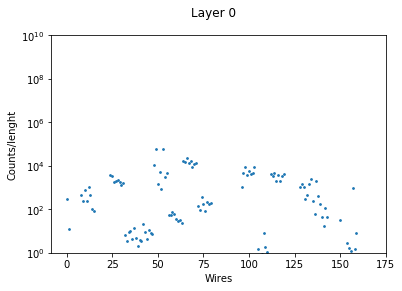

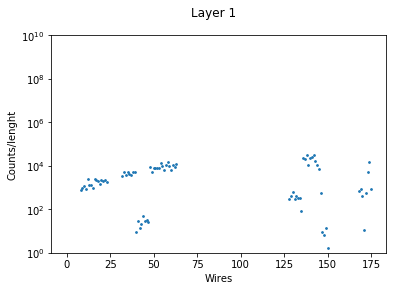

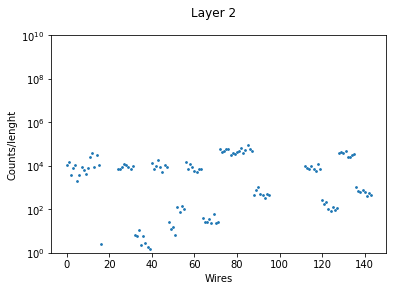

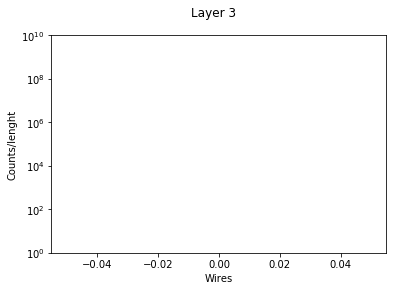

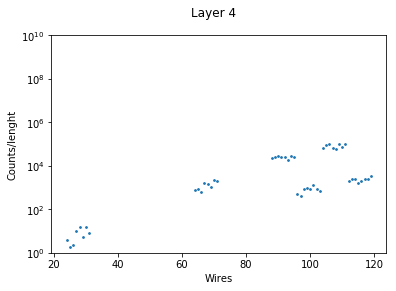

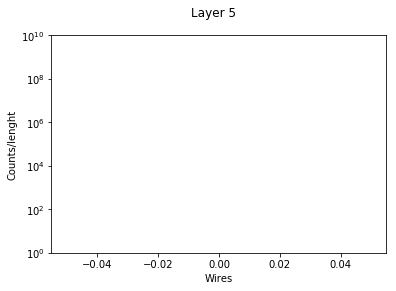

In [2]:
t = time.localtime()
timestamp = time.strftime('%b-%d-%Y_%H%M', t)
data_dir = "/workdir/jupyter/Dlab_2021_tot_data_taking_data"
stringName = "/scaler_to_lenght_trend_by_wires_"+timestamp
pdf = matplotlib.backends.backend_pdf.PdfPages(data_dir+stringName+".pdf")
scalar_to_lenght_list=[[],[],[],[],[],[]]
for index in range (len(layer_wires_list)):
    for iterator in range(len(layer_counts_list[index])):
        scalar_to_lenght_list[index].append(layer_counts_list[index][iterator]/wires_lenght_list[index][layer_wires_list[index][iterator]])
for index in range(len(layer_wires_list)):
    fig=plt.figure()
    ax = fig.add_subplot(111)
    plt.scatter(layer_wires_list[index],scalar_to_lenght_list[index],s=3)
    plt.yscale("log")
    plt.ylim(1,1e10)
    fig.suptitle("Layer {:d}".format(index))
    plt.xlabel("Wires")
    plt.ylabel("Counts/lenght")
    pdf.savefig( fig )
pdf.close()

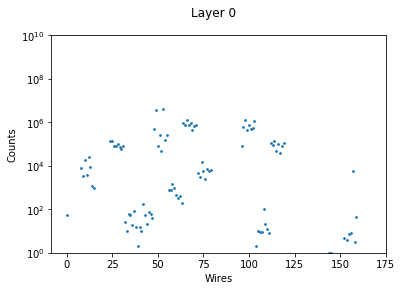

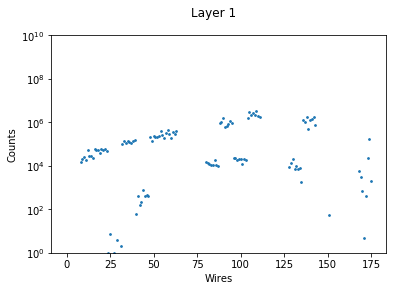

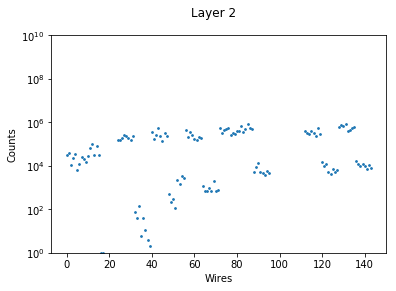

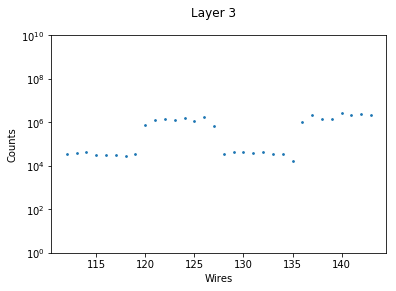

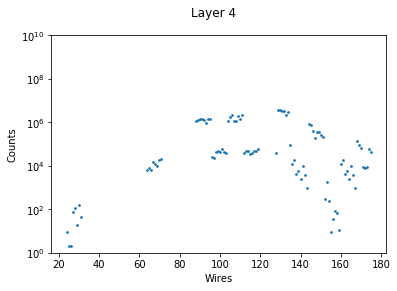

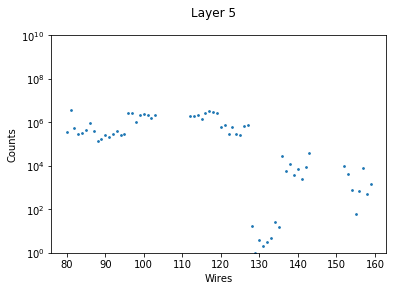

In [2]:
t = time.localtime()
timestamp = time.strftime('%b-%d-%Y_%H%M', t)
data_dir = "/workdir/jupyter/Dlab_2021_tot_data_taking_data"
stringName = "/scaler_trend_by_wires_"+timestamp
pdf = matplotlib.backends.backend_pdf.PdfPages(data_dir+stringName+".pdf")
for index in range(len(layer_wires_list)):
    fig=plt.figure()
    ax = fig.add_subplot(111)
    plt.scatter(layer_wires_list[index],layer_counts_list[index],s=3)
    plt.yscale("log")
    plt.ylim(1,1e10)
    fig.suptitle("Layer {:d}".format(index))
    plt.xlabel("Wires")
    plt.ylabel("Counts")
    pdf.savefig( fig )
pdf.close()

In [3]:
import baseline_calib
import numpy as np

def hist_rms(x,y):
  counts = np.sum(y)
  weights = y / counts
  mean = np.dot(x,weights)
  deviations = x - mean
  return np.sqrt(np.dot(deviations**2,weights))
def list_rms(x):
  mean = sum(x)/len(x)
  deviations = x - mean
  return np.sqrt(sum(deviations**2) /len(x))
def MeanArrays(xs,ys):
    return np.dot(xs,ys)/sum(ys)

layer_wires_list=[[],[],[],[],[],[]]
layer_mean_list=[[],[],[],[],[],[]]
layer_rms_list=[[],[],[],[],[],[]]

ptc.init_active_boards()
for name in db.active_board_list():

    #Baseline scan
    baseline_calib.baseline_calib_by_noise(name, dummy_calib=True)
    dummy_calib = db.get_calib_json_by_name(name,dummy_calib=True)
    tsbl_scan_raw = dummy_calib["noise_scan_raw"]
    tsbl_range    = dummy_calib["bl_range"]    
    
    #threshold scan
    #baseline_calib.char_noise_by_thresh_scan(name,dummy_calib=True)        
    #read threshold_scan from database:
    #dummy_calib = db.get_calib_json_by_name(name,dummy_calib=True)
    #tsbl_scan_raw = dummy_calib["tsbl_scan_raw"]
    #tsbl_range    = dummy_calib["tsbl_range"]
    
    rms_list = []
    mean_list = []
       
    for i in range(0,16):
        rms_list += [ hist_rms(tsbl_range,tsbl_scan_raw[i]) ]
        mean_list += [ MeanArrays(tsbl_range,tsbl_scan_raw[i]) ] 

    fpc_a=db.get_fpca_of_board(name)
    if(fpc_a>=0):
        layer_a=db.get_a_layer_of_board(name)
        mapping_a=db.get_fpca_mapping_of_board(name)
        layer_wires_list[layer_a]+=count_wires(fpc_a,mapping_a)
        layer_mean_list[layer_a]+=mean_list[0:4]
        layer_rms_list[layer_a]+=rms_list[0:4]
        
    fpc_b=db.get_fpcb_of_board(name)
    if(fpc_b>=0):
        layer_b=db.get_b_layer_of_board(name)
        mapping_b=db.get_fpcb_mapping_of_board(name)
        layer_wires_list[layer_b]+=count_wires(fpc_b,mapping_b)
        layer_mean_list[layer_b]+=mean_list[4:8]
        layer_rms_list[layer_b]+=rms_list[4:8]     
        
    fpc_c=db.get_fpcc_of_board(name)
    if(fpc_c>=0):
        layer_c=db.get_c_layer_of_board(name)
        mapping_c=db.get_fpcc_mapping_of_board(name)
        layer_wires_list[layer_c]+=count_wires(fpc_c,mapping_c)
        layer_mean_list[layer_c]+=mean_list[8:12]
        layer_rms_list[layer_c]+=rms_list[8:12]
        
    fpc_d=db.get_fpcd_of_board(name)
    if(fpc_d>=0):
        layer_d=db.get_d_layer_of_board(name)
        mapping_d=db.get_fpcd_mapping_of_board(name)
        layer_wires_list[layer_d]+=count_wires(fpc_d,mapping_d)
        layer_mean_list[layer_d]+=mean_list[12:16]
        layer_rms_list[layer_d]+=rms_list[12:16]        
print ("Done")


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


Done


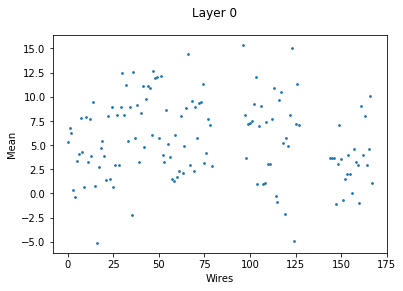

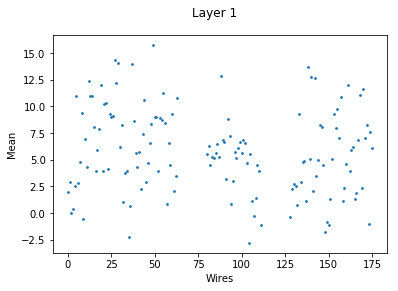

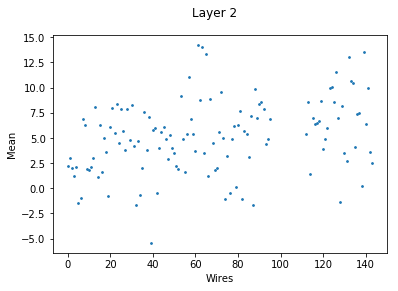

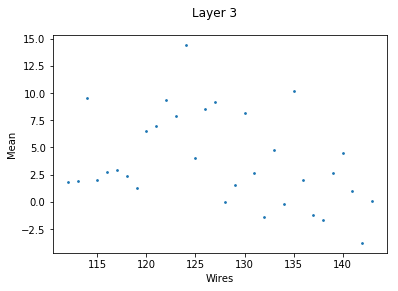

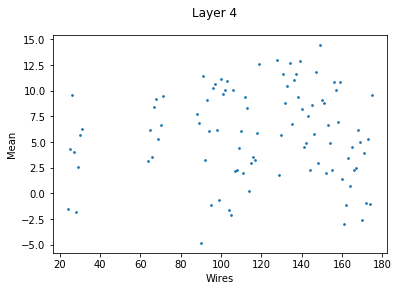

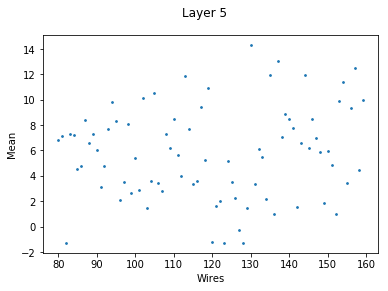

In [4]:
t = time.localtime()
timestamp = time.strftime('%b-%d-%Y_%H%M', t)
data_dir = "/workdir/jupyter/Dlab_2021_tot_data_taking_data"
stringName = "/mean_trend_by_wires_"+timestamp
pdf = matplotlib.backends.backend_pdf.PdfPages(data_dir+stringName+".pdf")
for index in range(len(layer_wires_list)):
    fig=plt.figure()
    ax = fig.add_subplot(111)
    plt.scatter(layer_wires_list[index],layer_mean_list[index],s=3)
    fig.suptitle("Layer {:d}".format(index))
    plt.xlabel("Wires")
    plt.ylabel("Mean")
    pdf.savefig( fig )
pdf.close()

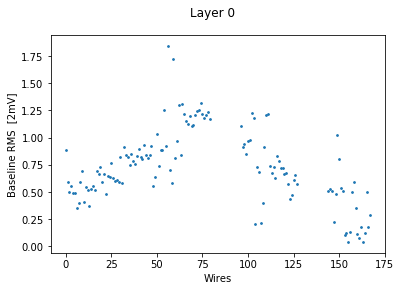

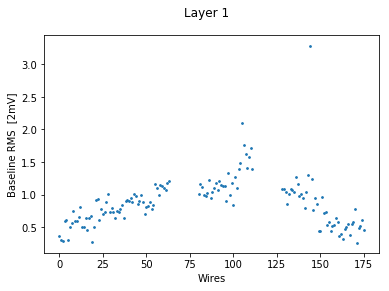

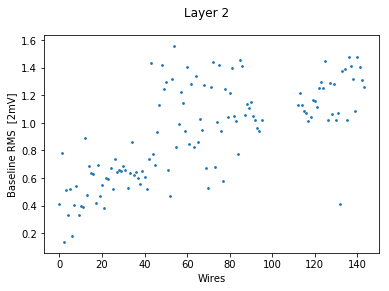

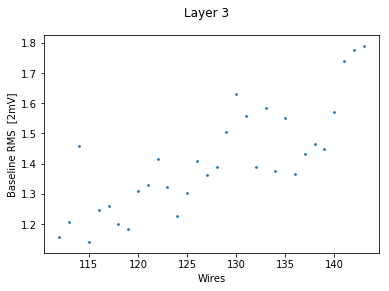

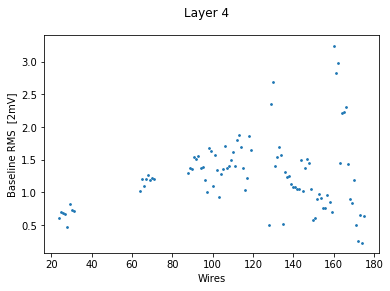

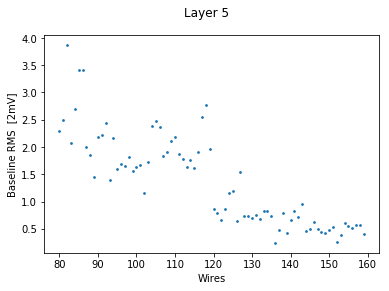

In [5]:
t = time.localtime()
timestamp = time.strftime('%b-%d-%Y_%H%M', t)
data_dir = "/workdir/jupyter/Dlab_2021_tot_data_taking_data"
stringName = "/baseline_rms_by_wires_"+timestamp
pdf = matplotlib.backends.backend_pdf.PdfPages(data_dir+stringName+".pdf")
for index in range(len(layer_wires_list)):
    #print(layer_rms_list[index])
    fig=plt.figure()
    ax = fig.add_subplot(111)
    plt.scatter(layer_wires_list[index],layer_rms_list[index],s=3)
    fig.suptitle("Layer {:d}".format(index))
    plt.xlabel("Wires")
    plt.ylabel("Baseline RMS  [2mV]")
    #plt.xlim(25,50)
    #plt.grid(axis='y',color='grey',which='both')
    pdf.savefig( fig )
pdf.close()